<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/AI-for-Human-Computer-Interaction/blob/main/Assignment3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyspark


In [6]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("AI_HCI").getOrCreate()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data.csv')

In [9]:
pyspark_df = spark.createDataFrame(df)

In [10]:
df.keys()

Index(['AnalysisDate', 'Date Of Death Year', 'Date Of Death Month',
       'Start Date', 'End Date', 'Jurisdiction of Occurrence', 'Sex',
       'Race/Ethnicity', 'AgeGroup', 'AllCause', 'NaturalCause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [11]:
pyspark_df.show()

+------------+------------------+-------------------+----------+----------+--------------------------+---+--------------------+-----------------+--------+------------+--------------------+-----------------------------+---------------------------+-----------------------+---------------------------------+--------------------------------------------+------------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+-------------------------------------------+----------------------------------+----------------------------------------+------------------------------------------+
|AnalysisDate|Date Of Death Year|Date Of Death Month|Start Date|  End Date|Jurisdiction of Occurrence|Sex|      Race/Ethnicity|         AgeGroup|AllCause|NaturalCause|Septicemia (A40-A41)|Malignant neoplasms (C00-C97)|Diabetes mellitus (E10-E14)|Alzhei

In [12]:
pyspark_df.createOrReplaceTempView("table_data")

In [13]:
spark.sql("SELECT sum(AllCause), AgeGroup FROM table_data GROUP BY AgeGroup").show()

+-------------+-----------------+
|sum(AllCause)|         AgeGroup|
+-------------+-----------------+
|       169769|      25-34 years|
|        58422|        0-4 years|
|       447999|      45-54 years|
|      1036182|      55-64 years|
|      1570390|      65-74 years|
|      1906828|      75-84 years|
|        13851|       5-14 years|
|        83497|      15-24 years|
|       242036|      35-44 years|
|      2344886|85 years and over|
+-------------+-----------------+



In [14]:
def create_histogram_age_group(df, column):
  result = df.groupby('AgeGroup')[column].sum().reset_index()
  result['SortingColumn'] = result['AgeGroup'].apply(lambda x: int(x[:2]) if x[:2].isdigit() else int(x[0]))

  # Sort the DataFrame based on the "SortingColumn"
  result = result.sort_values(by='SortingColumn', ascending=True)

  # Remove the temporary column
  result = result.drop(columns=['SortingColumn'])
  return result

### A. Create a histogram of death counts by age. [5 points]

<Axes: xlabel='AgeGroup'>

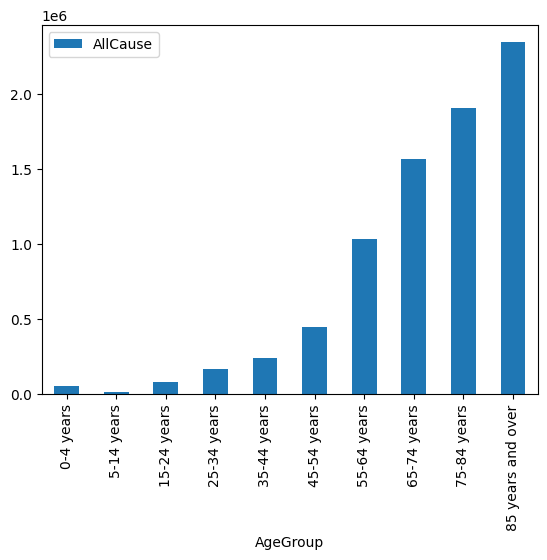

In [15]:
cause = 'AllCause'
create_histogram_age_group(df, cause).plot(x='AgeGroup', y='AllCause', kind='bar')

###  Create a histogram of deaths caused by Diabetes by age. [8 points]

<Axes: xlabel='AgeGroup'>

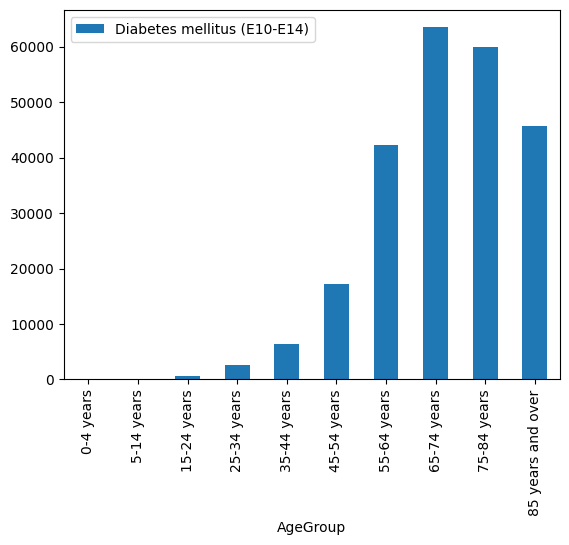

In [16]:
cause = 'Diabetes mellitus (E10-E14)'
create_histogram_age_group(df, cause).plot(x='AgeGroup', y=cause, kind='bar')

### Write down what you believe (before looking at the data. Just guess!) is the relationship
between age and death by heart disease. Do you expect the risk of death by heart
disease to be the same across all ages or higher in certain age ranges? Why?
[2 points]

---

I believe that the mortality rate from heart disease tends to rise with advancing age due to changes in our body's ability to efficiently process larger quantities of proteins, fats, and other substances that were more easily metabolized during our younger years.

---

### Write down what you believe (before looking at the data. Just guess!) is the relationship
between age and death by Natural Causes. Do you expect the risk of death by natural
causes to be the same across all ages or higher in certain age ranges? Why?
[2 points]

---
I hold the belief that mortality rates due to natural causes tend to be higher in both the very young and the elderly, while in the adolescent and middle-aged groups, the likelihood of death from natural causes is comparatively lower. It is often observed that infants and young children are more susceptible to natural causes of death during their early years, similar to the increased vulnerability that comes with aging.

---

### Create a histogram of death by Natural Causes by age. Create a histogram of death by
heart disease by age. [5 points]

<Axes: xlabel='AgeGroup'>

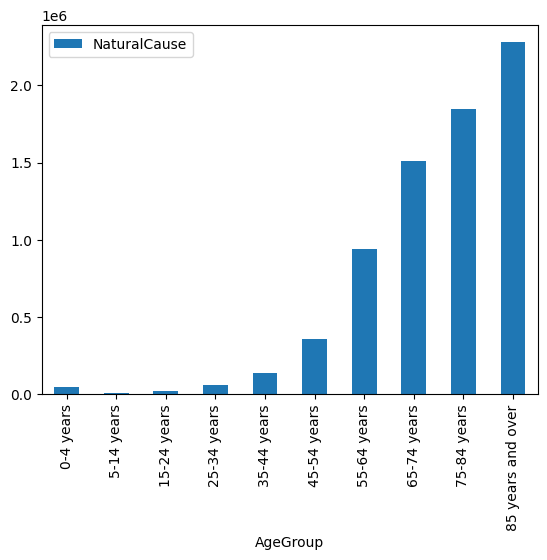

In [17]:
cause = 'NaturalCause'
create_histogram_age_group(df, cause).plot(x='AgeGroup', y=cause, kind='bar')

<Axes: xlabel='AgeGroup'>

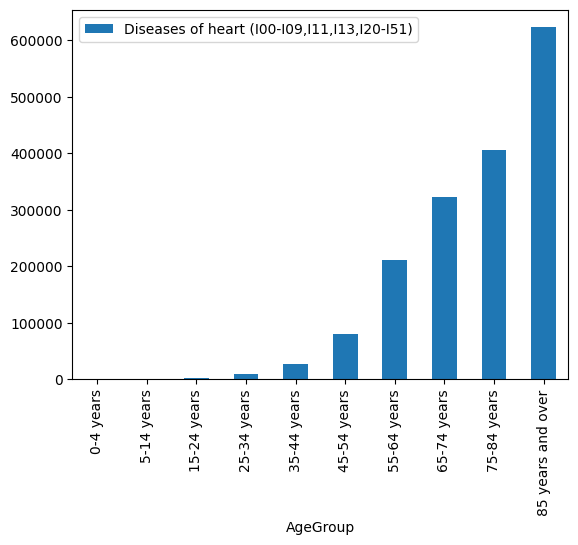

In [18]:
cause = 'Diseases of heart (I00-I09,I11,I13,I20-I51)'
create_histogram_age_group(df, cause).plot(x='AgeGroup', y=cause, kind='bar')

### Compare your prior guess in C and D to the histograms in E. What did you learn from the
histograms? Are there parts of your prior guess that were confirmed by the histograms? Are
there parts of your prior guess that were wrong or different than you expected?
[8 points]

---
The prior guess that natural and heart disease cause mortality rate is high during young age. When it comes to natural cause the mortality rate for 0-5 age was higher than the next ages close to it as predicted and with respect to heart diseases we see that it shows an increasing trend as the age increases may be it has something to do with age.


However, it's worth noting that the mortality rate for children aged 0-5, attributed to natural causes, is relatively lower when compared to that of older individuals.

---

### G. Create a visualization of your choice, where you overlay 4 different causes of death (your
pick) by age the same plot. Design this visualization however you wish. Justify your design
by writing a few sentences about how your visualization will help users compare the 4
different death risks by age. Talk about encoding choices such as: plot type, use of size,
color, and axes labels. [20 points]

When users see different possibilities separately in a data or Machine Learning systems, there’s a
bias towards thinking all possibilities are equally likely, when really some options are more or less
probable in real life. E.g., While a headache could be caused by fall allergies or by brain cancer, the
likelihood of fall allergies is far higher in real life than brain cancer.



1.          COVID-19 (U071, Multiple Cause of Death)
2.   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)
3. Influenza and pneumonia (J09-J18)
4. Diabetes mellitus (E10-E14)



In [25]:
df['AgeGroup'].unique().tolist()


['0-4 years',
 '5-14 years',
 '15-24 years',
 '25-34 years',
 '35-44 years',
 '45-54 years',
 '55-64 years',
 '65-74 years',
 '75-84 years',
 '85 years and over']

In [31]:
def get_count(df, cause):
  return create_histogram_age_group(df, cause)[cause]

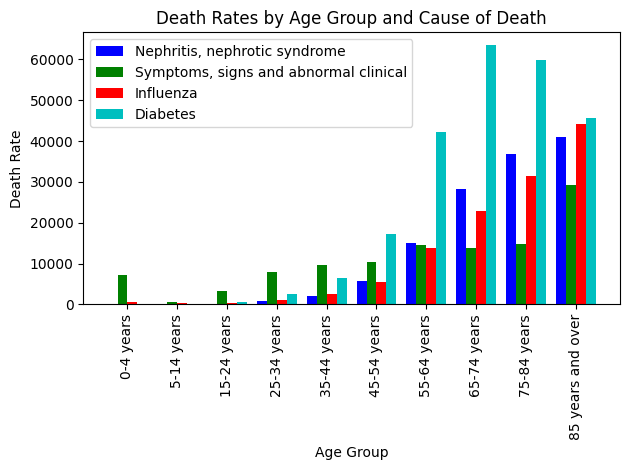

In [52]:
age_groups = df['AgeGroup'].unique().tolist()
c_1 = 'Nephritis, nephrotic syndrome'
c_2 = 'Symptoms, signs and abnormal clinical'
c_3 = 'Influenza'
c_4 = 'Diabetes'


cause_1 = get_count(df, 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)')
cause_2 = get_count(df, 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)')
cause_3 = get_count(df, 'Influenza and pneumonia (J09-J18)')
cause_4 = get_count(df, 'Diabetes mellitus (E10-E14)')


# Create an array for the x-axis positions
x = np.arange(len(age_groups))

# Define the width of the bars
bar_width = 0.2

# Create the grouped bar chart
plt.bar(x - 1.5 * bar_width, cause_1, width=bar_width, label=c_1, color='b', align='center')
plt.bar(x - 0.5 * bar_width, cause_2, width=bar_width, label=c_2, color='g', align='center')
plt.bar(x + 0.5 * bar_width, cause_3, width=bar_width, label=c_3, color='r', align='center')
plt.bar(x + 1.5 * bar_width, cause_4, width=bar_width, label=c_4, color='c', align='center')

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rates by Age Group and Cause of Death')
plt.xticks(x, age_groups, rotation=90)  # Adjust the rotation angle as needed
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


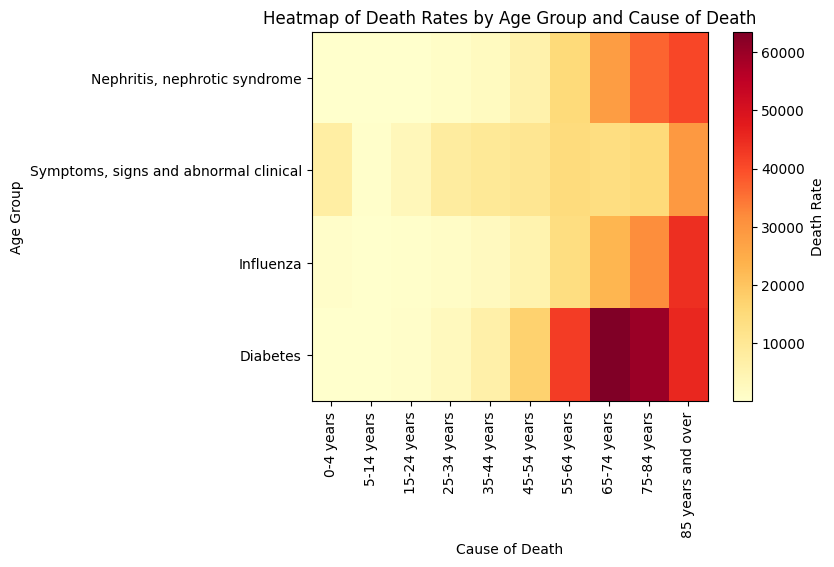

In [53]:
age_groups = df['AgeGroup'].unique().tolist()
causes = [c_1, c_2, c_3, c_4]

death_rates = np.array([
    cause_1.tolist(),
    cause_2.tolist(),
    cause_3.tolist(),
    cause_4.tolist()
])

# Create a heatmap
plt.imshow(death_rates, cmap='YlOrRd', aspect='auto')

# Customize the plot
plt.colorbar(label='Death Rate')
plt.yticks(np.arange(len(causes)), causes)
plt.xticks(np.arange(len(age_groups)), age_groups, rotation=90)

plt.xlabel('Cause of Death')
plt.ylabel('Age Group')
plt.title('Heatmap of Death Rates by Age Group and Cause of Death')

# Show the plot
plt.show()
